In [2]:
import pandas as pd

In [15]:
#for csv
df = pd.read_csv("data\Dhaka Rent.csv", sep=',')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [16]:
df.shape # row, col

(60, 2)

In [17]:
#for xlsx
#df = pd.read_excel("Dhaka Rent 2.xlsx")
#df.head()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [19]:
#missing checking
df.isnull().sum()

area    0
rent    0
dtype: int64

In [20]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [21]:
df[['rent']].head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


Text(0.5, 1.0, 'Dhaka Rent Analysis')

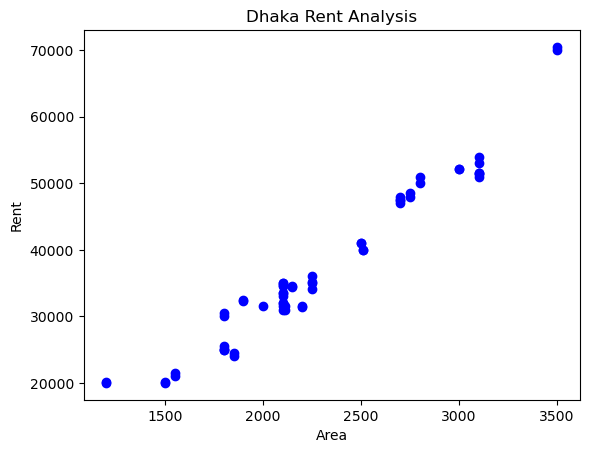

In [22]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

In [23]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [24]:
x = df['area'] #1d
y = df['rent']

# Linear Reagression - Step 01

In [25]:
import numpy as np

In [26]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [27]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [28]:
coefficient = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 
coefficient

21.292661473611954

In [29]:
intercept = mean_y - (coefficient * mean_x)

In [30]:
pred_y = (coefficient * 2000) + intercept
pred_y

31115.58750079281

In [31]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Train Test

In [32]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['area']], y, test_size=.30, random_state=42)

In [34]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [35]:
ytrain.head()

40    34400
4     52100
43    40000
19    47000
34    52200
Name: rent, dtype: int64

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [39]:
reg.coef_

array([20.68636687])

In [40]:
reg.intercept_

-10252.904740336751

In [41]:
m = reg.coef_
c = reg.intercept_
m*2000 + c

array([31119.82900279])

In [42]:
reg.predict([[2000]])

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31119.82900279])

In [43]:
reg.predict(xtest) # corrsponding to ytest(actual)

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [44]:
reg.score(xtest, ytest) #testing accuracy

0.9515542918540623

In [45]:
reg.score(xtrain, ytrain) #training accuracy

0.9471905709752625

In [49]:
df['predicted_rent'] = reg.predict(df[['area']])

In [50]:
df.head()

,area,rent,predicted_rent,residiuls
0,2000,31500,31119.829003,380.170997
1,2100,35000,33188.465690,1811.534310
2,2500,41050,41463.012439,-413.012439
3,2250,36100,36291.420721,-191.420721
4,3000,52100,51806.195874,293.804126


In [51]:
df['residiuls'] = df['rent'] - df['predicted_rent']

In [52]:
df.head()

,area,rent,predicted_rent,residiuls
0,2000,31500,31119.829003,380.170997
1,2100,35000,33188.465690,1811.534310
2,2500,41050,41463.012439,-413.012439
3,2250,36100,36291.420721,-191.420721
4,3000,52100,51806.195874,293.804126


In [53]:
#mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['rent'], df['predicted_rent'])

In [54]:
mse

6912277.636912411

In [55]:
#mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['rent'], df['predicted_rent'])

In [56]:
mae

2016.0444418768272

In [57]:
#RMSE
import math
math.sqrt(mse)

2629.1210768833776

Text(0.5, 1.0, 'Dhaka Rent Analysis')

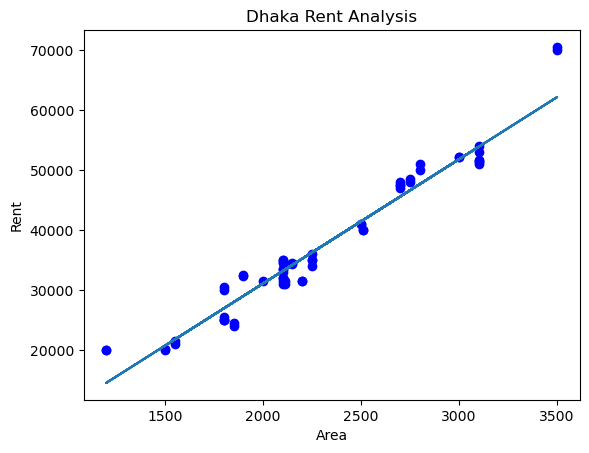

In [58]:
#BEST FIT LINE
#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_rent'])
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

In [59]:
np.mean(x)

2289.0

In [60]:
np.mean(y)

37269.166666666664

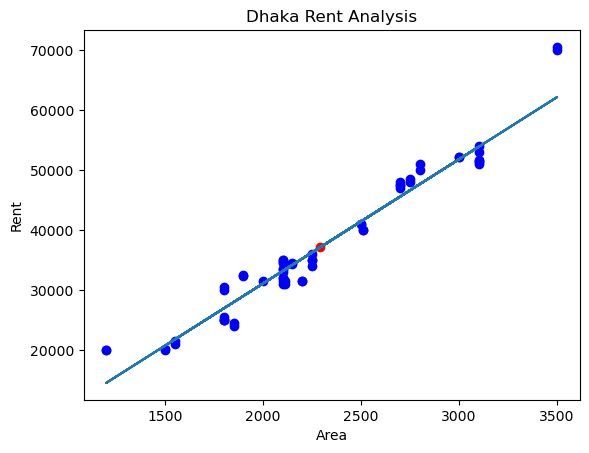

In [61]:
#BEST FIT LINE
#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_rent'])
#import matplotlib.pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')
#mean
plt.scatter(np.mean(x), np.mean(y), color='red', marker='o')